In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

###### 1. Загрузите данные по вариантам в ноутбук.

In [3]:
Math = pd.read_excel('Вариант 2.xlsx', header=2)

Math = Math.drop(index=Math.index[-1], axis=1)

###### 2. Сделайте описательную статистику полученных данных.

In [4]:
Math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   №                              2356 non-null   float64
 1   № школы                        2356 non-null   float64
 2   Класс                          2356 non-null   object 
 3   Пол                            2356 non-null   object 
 4   Номер варианта                 2356 non-null   float64
 5   Задания с кратким ответом      2356 non-null   object 
 6   Задания с развёрнутым ответом  2356 non-null   object 
 7   Устная часть                   0 non-null      object 
 8   Первичный балл                 2356 non-null   float64
 9   Балл                           2356 non-null   float64
 10  Минимальный балл               2356 non-null   float64
dtypes: float64(6), object(5)
memory usage: 202.6+ KB


###### 3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [41]:
Math[Math['Балл'] < Math['Балл'].mean()].shape[0] / Math.shape[0]

0.4800509337860781

###### 4. Найти процент учащихся не сдавших экзамен.

In [43]:
Math['Сдал экзамен'] = Math['Балл'] >= Math['Минимальный балл']
Math['Сдал экзамен'].sum() / Math.shape[0]

0.9078947368421053

###### 5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

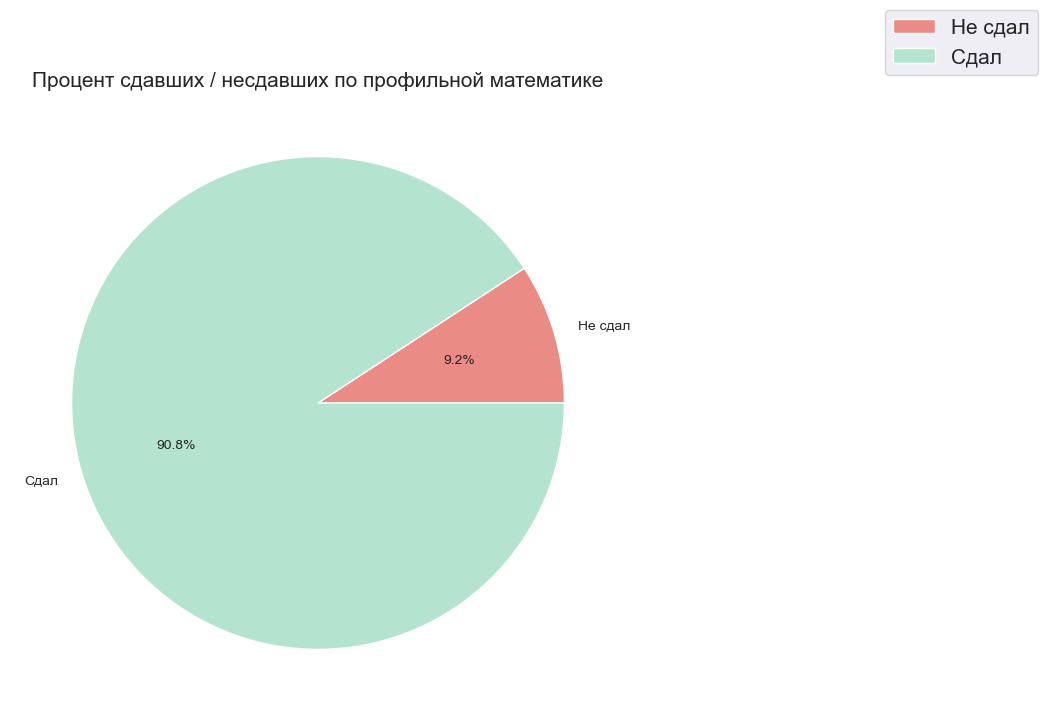

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))  
colors = ['#EA8B85', '#b4e4cf']
ax.pie(data=Math.groupby('Сдал экзамен')[['№']].count(), x='№', autopct='%1.1f%%', colors=colors, labels=['Не сдал', 'Сдал'])
ax.set_title('Процент сдавших / несдавших по профильной математике', fontsize=15)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=15)

###### 6. Постройте ядерную оценку плотности распределению баллов за экзамен.

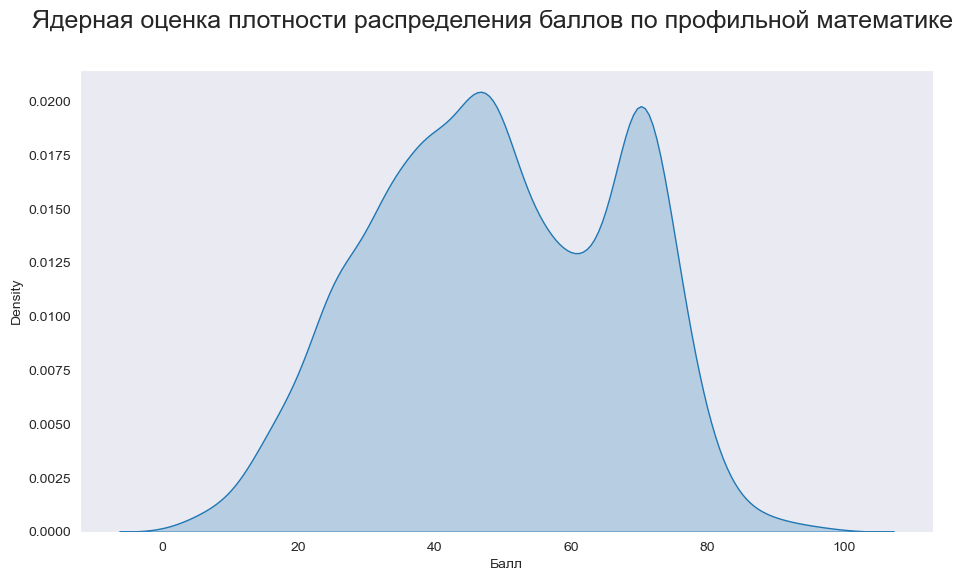

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
sns.set_style("dark")
sns.kdeplot(data=Math, x='Балл', ax=ax, fill=True)
plt.suptitle('Ядерная оценка плотности распределения баллов по профильной математике', fontsize=18);

###### 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [26]:
def get_mark(score):
    marks = [0, 27, 50, 75, 100]
    if score in range(marks[0], marks[1]):
        return "Неудволетворительно"
    if score in range(marks[1], marks[2]):
        return "Удволетворительно"
    if score in range(marks[2], marks[3]):
        return "Хорошо"
    if score in range(marks[3], marks[4]+1):
        return "Отлично"

In [28]:
Math['Оценка'] = Math['Балл'].apply(lambda x: get_mark(x))
index = ['Неудволетворительно', 'Удволетворительно', 'Хорошо', 'Отлично']

In [30]:
(Math.groupby('Оценка')[['№']].count() / Math.shape[0]).reindex(index=index).rename(columns={'№': 'Процент'})

,Процент
Оценка,
Неудволетворительно,0.092105
Удволетворительно,0.387946
Хорошо,0.462649
Отлично,0.057301


###### 8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [45]:
(Math.groupby('Пол')[['№']].count() / Math.shape[0]).rename(columns={'№': 'Процент'})

,Процент
Пол,
Ж,0.528438
М,0.471562


###### 9. Сколько школ принимало участие в экзамене?

In [46]:
Math['№ школы'].unique().size

17

###### 10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [37]:
len(Math['Задания с кратким ответом'].iloc[0])

12

In [47]:
Math['Задания с развёрнутым ответом'].iloc[0].count(')')

7

###### 11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ... Вк. Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [35]:
def to_int(val): 
    
    tr = {'+': 1, '-': 0}
    try:
        return int(val)
    except ValueError:
        return tr[val]

def calc(df):
    size = df.shape[0]
    
    max_xmpl = df['Задания с кратким ответом'].iloc[-1]
    max_xmpl = list(max_xmpl)
    df_B_max = [to_int(i) for i in max_xmpl]
        
    df_B_sc = []

    for i in range(len(df_B_max)):
        sc = df['Задания с кратким ответом'].str[i].agg(to_int).sum() 
        df_B_sc.append(sc)

    df_B_per = np.array(df_B_sc) / (np.array(df_B_max) * size)
    
    rdf = pd.DataFrame(data={f'B{i+1}': df_B_per[i] for i in range(len(df_B_per))}, index=['Процент выполненых']).T
    rdf['Процент невыполненных'] = 1 - rdf['Процент выполненых']
    
    return rdf

In [36]:
calc(Math)

,Процент выполненых,Процент невыполненных
B1,0.892615,0.107385
B2,0.953311,0.046689
B3,0.927844,0.072156
B4,0.910017,0.089983
B5,0.884975,0.115025
B6,0.731749,0.268251
B7,0.374788,0.625212
B8,0.478353,0.521647
B9,0.918506,0.081494
B10,0.714771,0.285229


###### 12. Аналогично и с типом С (ответы с развернутым ответом)

In [38]:
def calc2(df):
    size = df.shape[0]
    
    max_xmpl = df['Задания с развёрнутым ответом'].iloc[-1]
    max_xmpl = re.findall(r'[(][\d][)]', max_xmpl)[:-1] 
    df_C_max = [int(i[1]) for i in max_xmpl]
    df_C_sc = []
    for i in range(len(df_C_max)): 
        sc = df['Задания с развёрнутым ответом'].str[i*4].agg(int).sum()
        df_C_sc.append(sc)
    df_C_per = np.array(df_C_sc) / (np.array(df_C_max) * size) 
    rdf = pd.DataFrame(data={f'C{i+1}': df_C_per[i] for i in range(len(df_C_per))}, index=['Процент выполненых']).T
    rdf['Процент невыполненных'] = 1 - rdf['Процент выполненых']
    
    return rdf

In [40]:
calc2(Math)

,Процент выполненых,Процент невыполненных
C1,0.300297,0.699703
C2,0.116723,0.883277
C3,0.140705,0.859295
C4,0.012875,0.987125
C5,0.019666,0.980334
C6,0.006261,0.993739


In [48]:
Math

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Сдал экзамен,Оценка
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352.0,136.0,11,М,337.0,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25.0,92.0,27.0,True,Отлично
2352,2353.0,136.0,11,М,341.0,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25.0,92.0,27.0,True,Отлично
2353,2354.0,136.0,11,М,341.0,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0,True,Отлично
2354,2355.0,136.0,11,М,343.0,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0,True,Отлично


###### 13. Сделайте анализ по двум школам

In [62]:
schools = [128, 136]

school128 = Math[Math['№ школы'] == 128]
school136 = Math[Math['№ школы'] == 136]

In [68]:
school128

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Сдал экзамен,Оценка
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
10,11.0,128.0,11,М,340.0,-----++-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2.0,9.0,27.0,False,Неудволетворительно
26,27.0,128.0,11,Ж,345.0,-+------+-+-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3.0,14.0,27.0,False,Неудволетворительно
27,28.0,128.0,13,М,106.0,++--+-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3.0,14.0,27.0,False,Неудволетворительно
28,29.0,128.0,11,Ж,337.0,-+-++-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3.0,14.0,27.0,False,Неудволетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1940.0,128.0,11,Ж,343.0,++++++++++++,2(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,14.0,70.0,27.0,True,Хорошо
1940,1941.0,128.0,11,Ж,344.0,++++++-+++++,2(2)1(2)0(2)0(3)0(3)0(4)0(4),NaN,14.0,70.0,27.0,True,Хорошо
2074,2075.0,128.0,11,Ж,340.0,++++++++++++,2(2)1(2)0(2)0(3)0(3)0(4)0(4),NaN,15.0,72.0,27.0,True,Хорошо
2075,2076.0,128.0,11,М,340.0,++++++++++--,2(2)2(2)0(2)0(3)0(3)0(4)1(4),NaN,15.0,72.0,27.0,True,Хорошо


In [67]:
school136

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Сдал экзамен,Оценка
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
5,6.0,136.0,11,М,342.0,+-----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
6,7.0,136.0,11,М,341.0,+-----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0,False,Неудволетворительно
16,17.0,136.0,13,М,506.0,-+----+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2.0,9.0,27.0,False,Неудволетворительно
17,18.0,136.0,11,М,340.0,-+-+--------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2.0,9.0,27.0,False,Неудволетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352.0,136.0,11,М,337.0,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25.0,92.0,27.0,True,Отлично
2352,2353.0,136.0,11,М,341.0,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25.0,92.0,27.0,True,Отлично
2353,2354.0,136.0,11,М,341.0,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0,True,Отлично
2354,2355.0,136.0,11,М,343.0,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0,True,Отлично


###### 1. По всем выполненным заданиям типа В

Школа 128

In [63]:
calc(school128)

,Процент выполненых,Процент невыполненных
B1,0.876106,0.123894
B2,0.973451,0.026549
B3,0.867257,0.132743
B4,0.902655,0.097345
B5,0.849558,0.150442
B6,0.672566,0.327434
B7,0.203540,0.796460
B8,0.460177,0.539823
B9,0.902655,0.097345
B10,0.690265,0.309735


Школа 136

In [64]:
calc(school136)

,Процент выполненых,Процент невыполненных
B1,0.902941,0.097059
B2,0.964706,0.035294
B3,0.947059,0.052941
B4,0.910784,0.089216
B5,0.904902,0.095098
B6,0.746078,0.253922
B7,0.421569,0.578431
B8,0.479412,0.520588
B9,0.910784,0.089216
B10,0.730392,0.269608


###### 2. По заданиям типа С больше 50%

Школа 128

In [72]:
c128 = calc2(school128)
c128[c128['Процент выполненых'] > 0.1]

,Процент выполненых,Процент невыполненных
C1,0.163717,0.836283


Школа 136

In [71]:
c136 = calc2(school136)
c136[c136['Процент выполненых'] > 0.1]

,Процент выполненых,Процент невыполненных
C1,0.363235,0.636765
C2,0.158333,0.841667
C3,0.186275,0.813725


###### 3. По среднему баллу юношей и девушек

Школа 128

In [69]:
school128.groupby('Пол')[['Балл']].mean().rename(columns={'Балл': 'Средний балл'})

,Средний балл
Пол,
Ж,44.926471
М,42.888889


Школа 136

In [70]:
school136.groupby('Пол')[['Балл']].mean().rename(columns={'Балл': 'Средний балл'})

,Средний балл
Пол,
Ж,50.977444
М,52.399590
